In [1]:
import anndata as ad
import h5py
import scvelo as scv
import warnings

In [ ]:
scv.settings.verbosity = 3  
scv.settings.presenter_view = True 
scv.set_figure_params('scvelo') 
scv.settings.figdir = "/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/results/"
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
adata = ad.read_h5ad("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/adata_combined.h5ad")
adata_subset = ad.read_h5ad("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/adata_subset.h5ad")

In [3]:
adata_raw = adata.copy() 
adata_raw = adata_raw[adata_subset.obs_names].copy()
adata_raw.obsm["X_umap"] = adata_subset.obsm["X_umap"]
adata_raw.obs["leiden"] = adata_subset.obs["leiden"]

In [4]:
adata_velocity=adata_raw.copy()

In [5]:
adata_velocity=adata_raw.copy()
scv.pp.filter_and_normalize(
    adata_velocity,
    min_counts=20,
    min_cells=5,
    n_top_genes=None, 
    log=True  
)
scv.pp.moments(adata_velocity, n_pcs=35, n_neighbors=45)
scv.tl.velocity(adata_velocity, mode="stochastic", n_jobs=8)
scv.tl.velocity_graph(adata_velocity, n_jobs=8)

Filtered out 13611 genes that are detected 20 counts (spliced).
Normalized count data: X, spliced, unspliced.
Logarithmized X.


/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/scratch/local/8083808/ipykernel_1643471/634793690.py:9: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata_velocity, n_pcs=35, n_neighbors=45)
/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Aut

computing neighbors
    finished (0:00:08) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 8/128 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:38) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [ ]:
adata_velocity = ad.read_h5ad("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/adata_velocity.h5ad")
#adata_velocity = ad.read_h5ad("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/adata_velocity.h5ad")

computing velocity embedding


/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


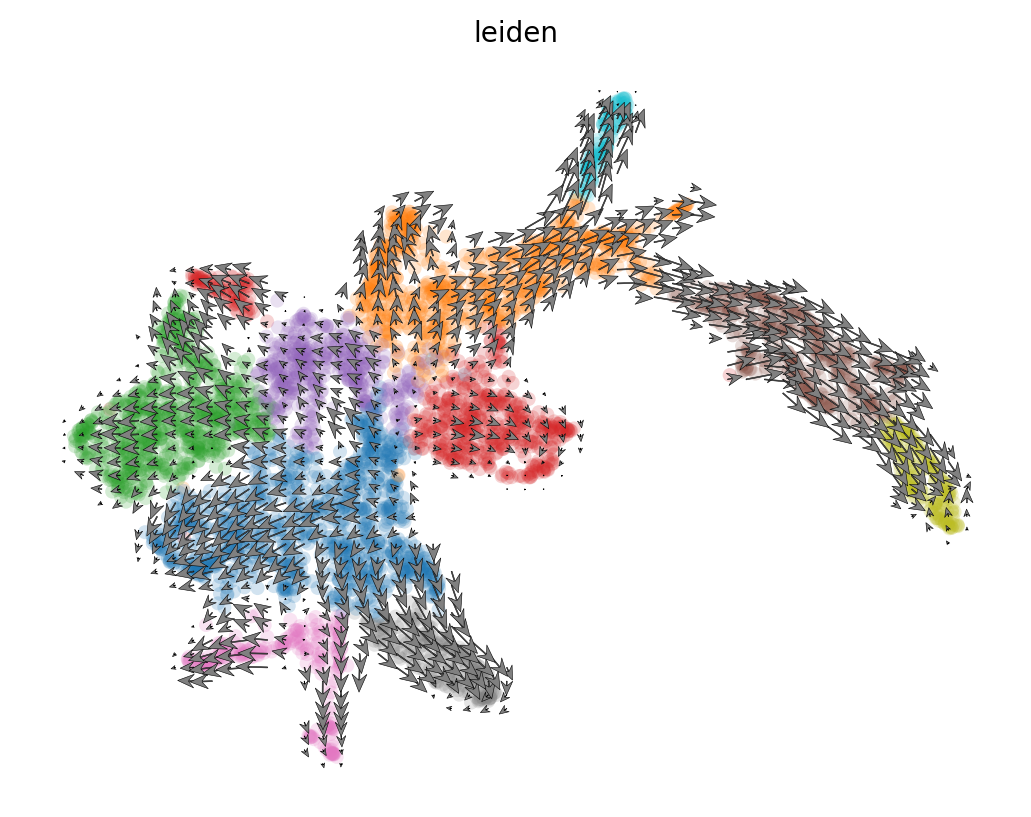

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])


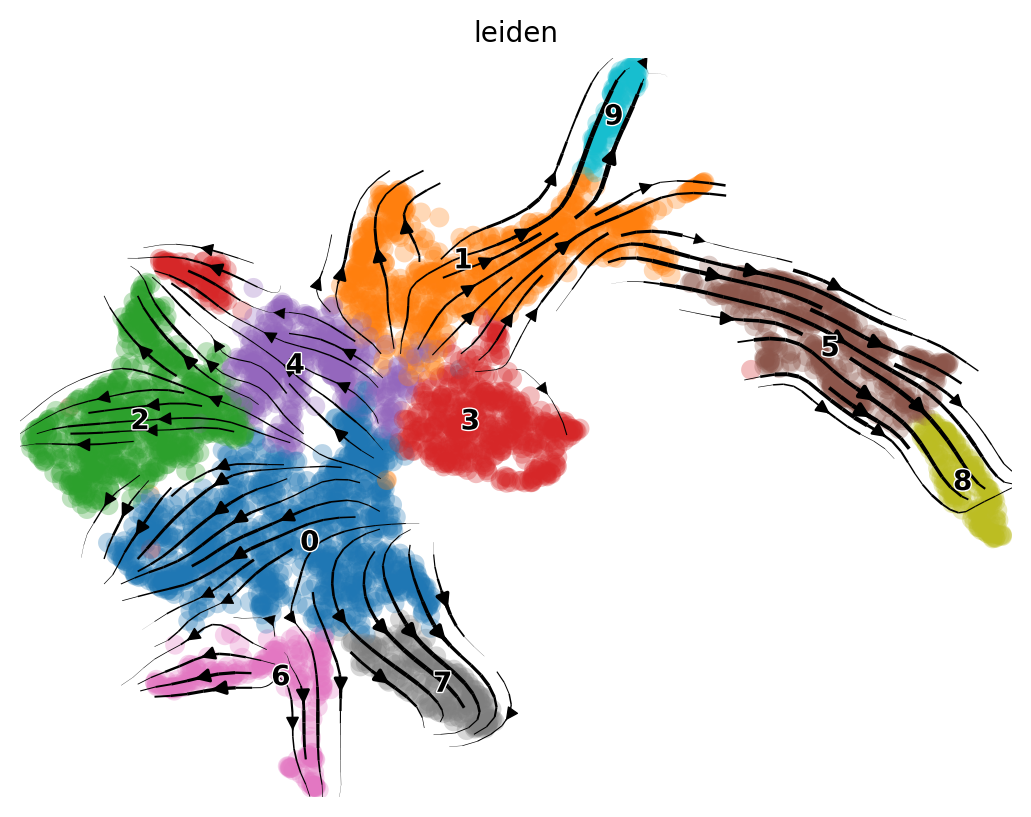

In [6]:
scv.pl.velocity_embedding_grid(
        adata_velocity,
        basis="umap",
        arrow_length=3,
        density=1,
        arrow_size=3,dpi=200,color="leiden",
        #save="plus345_2_subset_velocity_stream_grey.svg"
)
scv.pl.velocity_embedding_stream(adata_velocity, basis='umap',dpi=200,color="leiden",
                                 #save="plus345_2_subset_velocity_stream_grey.svg"
                                )

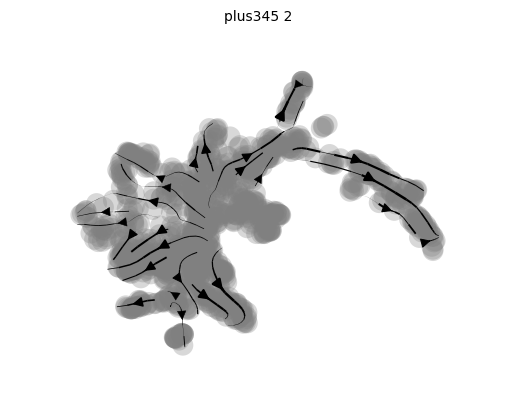

In [9]:
#velocity by sample
adata_sample = adata_velocity[adata_velocity.obs["sample"] == "p5_1"].copy()

scv.pl.velocity_embedding_stream(
    adata_sample,
    basis="umap",
    #arrow_length=2,
    density=.85,
    title="plus345_2",
    arrow_size=1.5,
    #color="leiden",
    #palette=glasbey_clean_24,
    add_margin=0.2,
    #save="plus345_2_subset_velocity_stream_grey.svg"
)